<a href="https://colab.research.google.com/github/xFlodz/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%965%20%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B%20%D0%9D%D0%A1%20%D0%B8%20Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model = keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet50v2",
)

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = []

img_1 = cv2.imread('/content/drive/MyDrive/work5/beagle.png')
img_1 = cv2.resize(img_1, (320, 320))

img_2 = cv2.imread('/content/drive/MyDrive/work5/rugby.jpg')
img_2 = cv2.resize(img_2, (320, 320))

img_3 = cv2.imread('/content/drive/MyDrive/work5/snail.png')
img_3 = cv2.resize(img_3, (320, 320))

img_4 = cv2.imread('/content/drive/MyDrive/work5/tarantula.png')
img_4 = cv2.resize(img_4, (320, 320))

img_5 = cv2.imread('/content/drive/MyDrive/work5/toucan.png')
img_5 = cv2.resize(img_5, (320, 320))

images.append(img_1)
images.append(img_2)
images.append(img_3)
images.append(img_4)
images.append(img_5)
images = np.array(images)

images.shape

(5, 320, 320, 3)

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = cv2.resize(image, (shape[0], shape[1]))
    proc_image = proc_image.reshape(shape[0], shape[1], shape[2])
    proc_images.append(proc_image)
  proc_images = np.array(proc_images)

  return proc_images

input_images = normalize(images, (224, 224, 3))

input_images = keras.applications.resnet_v2.preprocess_input(input_images)

input_images.shape

(5, 224, 224, 3)

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

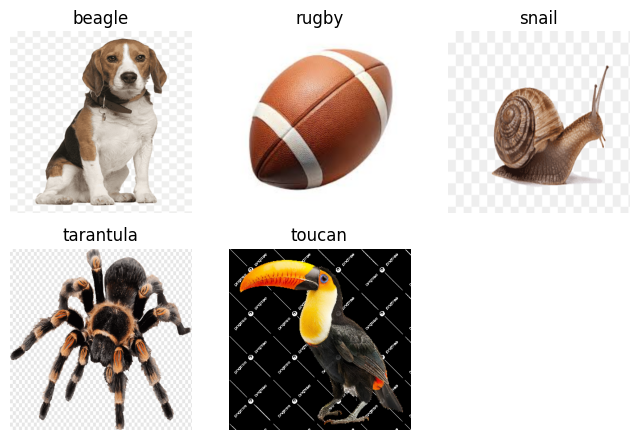

In [ ]:
class_name = ['beagle', 'rugby', 'snail', 'tarantula', 'toucan']

plt.figure(figsize=(8, 8))
for i in range(5):
  image = images[i]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[:, :, ::-1])
  plt.title(class_name[i])
  plt.axis("off")

In [ ]:
res = model.predict(input_images)
for i in res:
  print(np.argmax(i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
162
852
113
76
96


In [ ]:
true_res = keras.applications.resnet_v2.decode_predictions(res, top=3)
for i in range(5):
  print(true_res[i])

[('n02088364', 'beagle', np.float32(0.91134125)), ('n02089867', 'Walker_hound', np.float32(0.06924062)), ('n02089973', 'English_foxhound', np.float32(0.0116844))]
[('n04409515', 'tennis_ball', np.float32(0.5753657)), ('n02802426', 'basketball', np.float32(0.31539288)), ('n04118538', 'rugby_ball', np.float32(0.033954073))]
[('n01944390', 'snail', np.float32(0.99968815)), ('n01943899', 'conch', np.float32(0.00012735312)), ('n03476684', 'hair_slide', np.float32(6.2619045e-05))]
[('n01774750', 'tarantula', np.float32(0.9999964)), ('n01775062', 'wolf_spider', np.float32(2.826116e-06)), ('n01773549', 'barn_spider', np.float32(7.371464e-07))]
[('n01843383', 'toucan', np.float32(0.9995215)), ('n01829413', 'hornbill', np.float32(0.00047209117)), ('n03000134', 'chainlink_fence', np.float32(1.3273077e-06))]


# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
basic_model = keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',
)

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
%%capture
!unzip /content/drive/MyDrive/animals_new.zip -d animals

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
from keras.models import load_model
from imutils import paths
import random
import pickle
import cv2
import os

In [ ]:
imagesPath = sorted(list(paths.list_images('/content/animals/raw-img')))
random.shuffle(imagesPath)

In [ ]:
class_dict = {}

for imagePath in imagesPath:
    label = imagePath.split(os.path.sep)[-2]
    if label not in class_dict:
        class_dict[label] = []
    class_dict[label].append(imagePath)

balanced_images = []
for label, images in class_dict.items():
    balanced_images.extend(images[:1000])

data, labels_str = [], []

for imagePath in balanced_images:
    try:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64)).flatten()
        data.append(image)
        label = imagePath.split(os.path.sep)[-2]
        labels_str.append(label)
    except:
        continue

data = np.array(data, dtype="float") / 255.0
data = data.reshape((-1, 64, 64, 3))

In [ ]:
unique_labels = np.unique(labels_str)
label_map = {lbl: idx for idx, lbl in enumerate(unique_labels)}
labels_int = np.array([label_map[lbl] for lbl in labels_str], dtype="int")

unique_labels, label_map, labels_int

(array(['chicken', 'cow', 'dog', 'elephant'], dtype='<U8'),
 {np.str_('chicken'): 0,
  np.str_('cow'): 1,
  np.str_('dog'): 2,
  np.str_('elephant'): 3},
 array([1, 1, 1, ..., 3, 3, 3]))

In [ ]:
from tensorflow.keras.utils import to_categorical

(X_train, X_test, trainY_int, testY_int) = train_test_split(data, labels_int, test_size=0.25, random_state=52)

Y_train = to_categorical(trainY_int, num_classes=len(unique_labels))
Y_test = to_categorical(testY_int, num_classes=len(unique_labels))

### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [ ]:
for layer in basic_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

input_tensor = basic_model.input
x = basic_model.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(4, activation='softmax')(x)

my_new_model = Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
my_new_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/resnet50v2_best.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

In [ ]:
history = my_new_model.fit(X_train, Y_train, batch_size=50, epochs=20, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 858ms/step - accuracy: 0.8659 - loss: 0.4127 - val_accuracy: 0.6700 - val_loss: 0.9681
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 852ms/step - accuracy: 0.9533 - loss: 0.2089 - val_accuracy: 0.6950 - val_loss: 1.0152
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 817ms/step - accuracy: 0.9872 - loss: 0.1074 - val_accuracy: 0.6900 - val_loss: 1.0864
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 810ms/step - accuracy: 0.9987 - loss: 0.0562 - val_accuracy: 0.6767 - val_loss: 1.1224
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 814ms/step - accuracy: 1.0000 - loss: 0.0319 - val_accuracy: 0.6867 - val_loss: 1.1599
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 805ms/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 0.6867 - val_loss: 1.2241


### 2.4. Визуализация процесса обучения модели

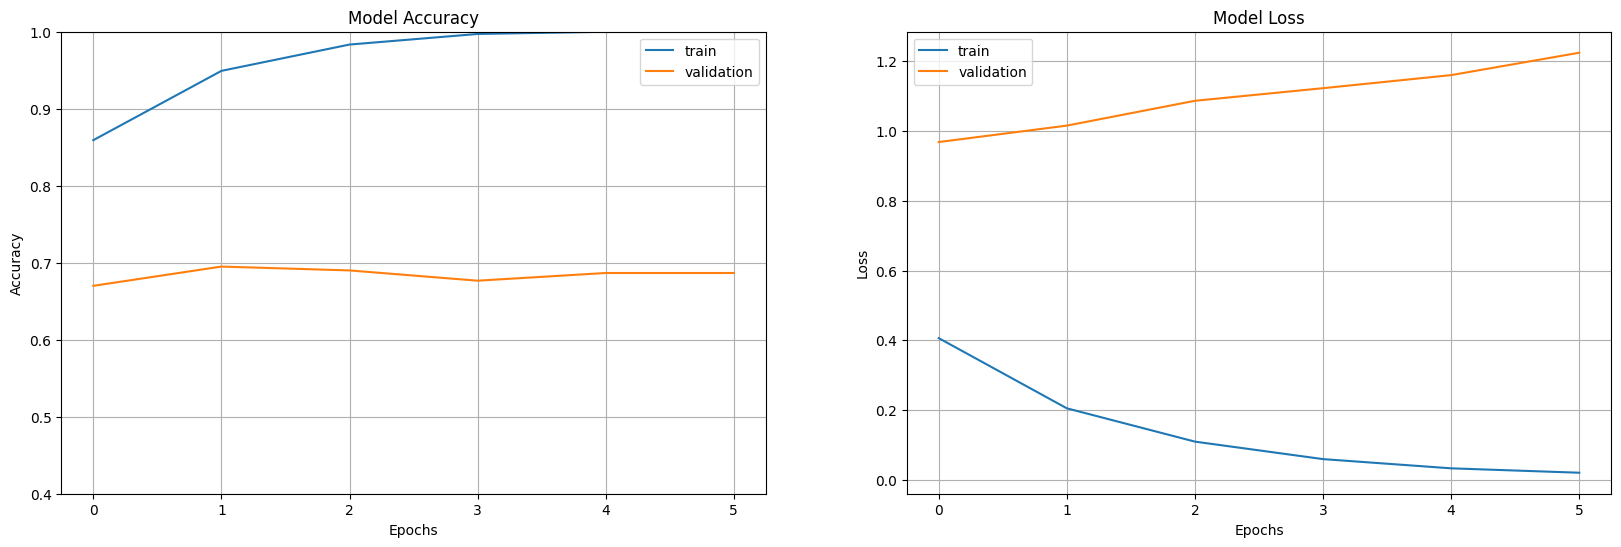

In [ ]:
plt.figure(figsize=(20, 6))

ax = plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

ax = plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00


### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [ ]:
def classify(image):
  labels = ['chicken', 'cow', 'dog', 'elephant']
  image_resized = cv2.resize(image, (64, 64))
  image = np.expand_dims(image_resized,axis=0)
  image = keras.applications.resnet_v2.preprocess_input(image)
  preds = my_new_model.predict(image).flatten()
  confidences = {labels[i]: float(preds[i]) for i in range(len(preds))}

  return confidences

In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=classify,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(unique_labels)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/drive/MyDrive/test_data/chicken.jpeg",
              "/content/drive/MyDrive/test_data/cow.jpeg",
              "/content/drive/MyDrive/test_data/dog.jpeg",
              "/content/drive/MyDrive/test_data/elephant.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19ded5403dbeec2153.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [ ]:

%%capture
!unzip /content/drive/MyDrive/EuroSAT.zip -d eurosat

In [ ]:
from imutils import paths
import random

imagesPath = sorted(list(paths.list_images('/content/eurosat/2750')))
random.shuffle(imagesPath)

In [ ]:
def load_images(imagePaths):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath)

In [ ]:
data = np.array(data)
labels = np.array(labels)

data.shape

(27000, 64, 64, 3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

data_n = keras.applications.vgg16.preprocess_input(data)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.05)
(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.3)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17955, 64, 64, 3)
(7695, 64, 64, 3)
(1350, 64, 64, 3)


### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [ ]:
vgg_model = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',
)

for layer in vgg_model.layers:
  layer.trainable = False

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input

input_tensor = vgg_model.input
x = vgg_model.output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

my_model = Model(inputs=input_tensor, outputs=output_tensor)

my_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │              

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
my_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/vgg_best.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

In [ ]:
vgg_history = my_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=57, epochs=20, callbacks=[early_stopping, checkpoint])


Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1194s 4s/step - accuracy: 0.7182 - loss: 1.8009 - val_accuracy: 0.8543 - val_loss: 0.5813
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1144s 4s/step - accuracy: 0.8903 - loss: 0.3668 - val_accuracy: 0.8797 - val_loss: 0.4704
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1210s 4s/step - accuracy: 0.9278 - loss: 0.2238 - val_accuracy: 0.8804 - val_loss: 0.4502
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1162s 4s/step - accuracy: 0.9388 - loss: 0.1696 - val_accuracy: 0.8864 - val_loss: 0.4521
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1160s 4s/step - accuracy: 0.9582 - loss: 0.1246 - val_accuracy: 0.8682 - val_loss: 0.5126
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1118s 4s/step - accuracy: 0.9632 - loss: 0.1079 - val_accuracy: 0.8840 - val_loss: 0.5231
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1114s 4s/step - accuracy: 0.9657 - loss: 0.1000 - val_accuracy: 0.8827 - val_loss: 0.5109
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1167s 4s/step - accuracy: 0.9727 - loss: 0.0735 - 



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [ ]:
from sklearn.metrics import classification_report

predictions = my_model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

241/241 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step
                      precision    recall  f1-score   support

          AnnualCrop       0.92      0.88      0.90       834
              Forest       0.93      0.97      0.95       846
HerbaceousVegetation       0.89      0.86      0.88       871
             Highway       0.86      0.63      0.73       692
          Industrial       0.86      0.93      0.89       710
             Pasture       0.77      0.91      0.83       562
       PermanentCrop       0.81      0.83      0.82       748
         Residential       0.97      0.89      0.93       850
               River       0.75      0.88      0.81       712
             SeaLake       0.98      0.96      0.97       870

            accuracy                           0.88      7695
           macro avg       0.87      0.87      0.87      7695
        weighted avg       0.88      0.88      0.88      7695



241/241 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step


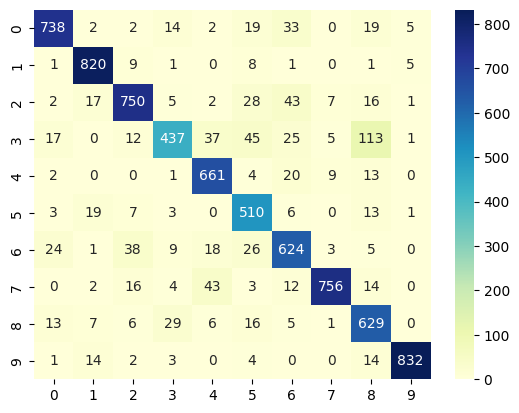

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = my_model.predict(X_val, batch_size=32)

Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

conf_mat = confusion_matrix(Y_val, Y_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [ ]:
predictions = my_model.predict(X_test, batch_size=32)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

43/43 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step
                      precision    recall  f1-score   support

          AnnualCrop       0.93      0.90      0.91       155
              Forest       0.94      0.95      0.94       152
HerbaceousVegetation       0.91      0.87      0.89       143
             Highway       0.81      0.69      0.74       122
          Industrial       0.91      0.92      0.92       117
             Pasture       0.79      0.88      0.83       102
       PermanentCrop       0.74      0.82      0.78       117
         Residential       0.98      0.85      0.91       170
               River       0.75      0.88      0.81       120
             SeaLake       0.98      0.98      0.98       152

            accuracy                           0.88      1350
           macro avg       0.87      0.88      0.87      1350
        weighted avg       0.88      0.88      0.88      1350



43/43 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step


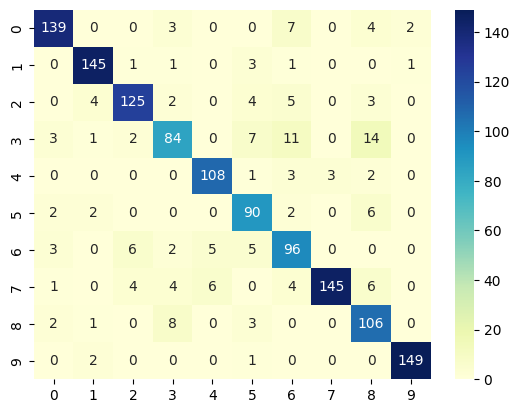

In [ ]:
Y_pred = my_model.predict(X_test, batch_size=32)

Y_pred = Y_pred.argmax(axis=1)
Y_test = Y_test.argmax(axis=1)

conf_mat = confusion_matrix(Y_test, Y_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------


Количество эпох нужно выбирать так чтоб не переобучить модель
Размер пакета надо выбирать не слишком большой, но и не слишком маленький, так чтоб обучение происходило не слишком долго. 32/64/128 +-
Функцию активации надо выбирать от назначения модели. SoftMax в задачах класификации.
Самый оптимальный оптимизатор - adam, но его следует подбирать в завимости от количества данных
Для регуляризации чаще всего используется BatchNormalization и Dropout.

Все параметры зависият от конкретных задач и данных. Лучше всего подобрать параметры опытным путем.